## Converting Video to Image Frames

In [1]:
import cv2
import os

# Paths
video_path = '/Users/jashtandel/Downloads/kick.mov'
output_folder = '/Users/jashtandel/SEM6/HAAD/data/valid_images/kick'
start_frame_number = 681  # Starting frame number

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    frame_number = start_frame_number  # Start numbering from 681
    success, frame = cap.read()
    
    while success:
        # Construct the filename for the output frame
        filename = f'{output_folder}/{frame_number:05}.jpg'
        
        # Save the frame as JPEG
        cv2.imwrite(filename, frame)
        
        # Move to the next frame and update frame number
        success, frame = cap.read()
        frame_number += 1

    cap.release()
    print("Frame extraction complete.")


Frame extraction complete.


## Yolov8 Pose

In [9]:
import cv2
from PIL import Image
from pydantic import BaseModel

import ultralytics

## Code For Using Mac - GPU

In [13]:
import torch
from ultralytics import YOLO

# Check if MPS (Metal Performance Shaders) is available
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

# Load the YOLO model and specify the device
model = YOLO(model='/Users/jashtandel/SEM6/HAAD/yolo11s-pose.pt').to(device)

# Example of running the model on an input
# image = '/path/to/your/image.jpg'
# results = model(image)

# Print the device to confirm

print(f"Model is running on device: {device}")


Model is running on device: mps


In [15]:
image = cv2.imread('/Users/jashtandel/SEM6/HAAD/data/Training_images/jump/01043.jpg')
result = model.predict(image, save=False)[0]
result_keypoint = result.keypoints.xyn.cpu().numpy()[0]
result.boxes.xyxy



0: 448x640 1 person, 641.5ms
Speed: 29.7ms preprocess, 641.5ms inference, 1674.0ms postprocess per image at shape (1, 3, 448, 640)


tensor([[498.,   0., 670., 553.]], device='mps:0')

In [17]:
result.keypoints[0]

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9949, 0.9922, 0.9482, 0.9695, 0.4548, 0.9994, 0.9985, 0.9958, 0.9788, 0.9902, 0.9639, 0.9998, 0.9997, 0.9993, 0.9987, 0.9904, 0.9870]], device='mps:0')
data: tensor([[[5.5279e+02, 5.0516e+01, 9.9486e-01],
         [5.6799e+02, 4.0594e+01, 9.9218e-01],
         [5.4643e+02, 3.9183e+01, 9.4817e-01],
         [5.9346e+02, 5.4000e+01, 9.6948e-01],
         [0.0000e+00, 0.0000e+00, 4.5481e-01],
         [6.2095e+02, 1.2919e+02, 9.9935e-01],
         [5.2834e+02, 1.2034e+02, 9.9846e-01],
         [6.5327e+02, 2.1273e+02, 9.9580e-01],
         [5.2264e+02, 1.9271e+02, 9.7883e-01],
         [5.8142e+02, 2.4150e+02, 9.9017e-01],
         [5.1627e+02, 2.3974e+02, 9.6388e-01],
         [5.9914e+02, 2.9690e+02, 9.9983e-01],
         [5.3818e+02, 2.8993e+02, 9.9966e-01],
         [6.0066e+02, 4.1374e+02, 9.9929e-01],
         [5.4099e+02, 4.0283e+02, 9.9866e-01],
         [6.1601e+02, 5.1088e+02, 9.9043e-01],
         [5

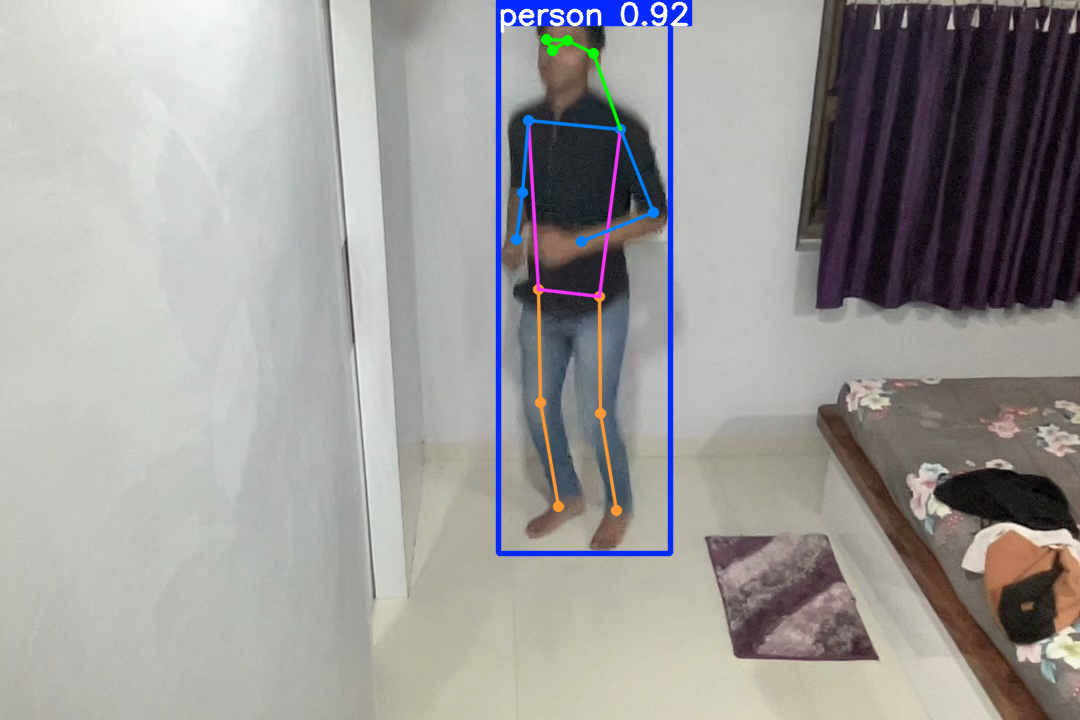

In [19]:
Image.fromarray(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))

## Generate Dataset

### Keypoint extract

Yolov8 pose estimation memiliki 17 keypoint 
* NOSE:           int = 0
* LEFT_EYE:       int = 1
* RIGHT_EYE:      int = 2
* LEFT_EAR:       int = 3
* RIGHT_EAR:      int = 4
* LEFT_SHOULDER:  int = 5
* RIGHT_SHOULDER: int = 6
* LEFT_ELBOW:     int = 7
* RIGHT_ELBOW:    int = 8
* LEFT_WRIST:     int = 9
* RIGHT_WRIST:    int = 10
* LEFT_HIP:       int = 11
* RIGHT_HIP:      int = 12
* LEFT_KNEE:      int = 13
* RIGHT_KNEE:     int = 14
* LEFT_ANKLE:     int = 15
* RIGHT_ANKLE:    int = 16

In [21]:
class GetKeypoint(BaseModel):
    NOSE:           int = 0
    LEFT_EYE:       int = 1
    RIGHT_EYE:      int = 2
    LEFT_EAR:       int = 3
    RIGHT_EAR:      int = 4
    LEFT_SHOULDER:  int = 5
    RIGHT_SHOULDER: int = 6
    LEFT_ELBOW:     int = 7
    RIGHT_ELBOW:    int = 8
    LEFT_WRIST:     int = 9
    RIGHT_WRIST:    int = 10
    LEFT_HIP:       int = 11
    RIGHT_HIP:      int = 12
    LEFT_KNEE:      int = 13
    RIGHT_KNEE:     int = 14
    LEFT_ANKLE:     int = 15
    RIGHT_ANKLE:    int = 16

get_keypoint = GetKeypoint()

In [23]:
import os
import glob

In [39]:
import os

dataset_root = '/Users/jashtandel/SEM6/HAAD/data'
pose_list = sorted(os.listdir(dataset_root))  # Sorts the list alphabetically
pose_list


['.DS_Store',
 'Testing_images',
 'Training_images',
 'output_csv',
 'source_images']

In [27]:
def extract_keypoint(keypoint):
    # nose
    nose_x, nose_y = keypoint[get_keypoint.NOSE]
    # eye
    left_eye_x, left_eye_y = keypoint[get_keypoint.LEFT_EYE]
    right_eye_x, right_eye_y = keypoint[get_keypoint.RIGHT_EYE]
    # ear
    left_ear_x, left_ear_y = keypoint[get_keypoint.LEFT_EAR]
    right_ear_x, right_ear_y = keypoint[get_keypoint.RIGHT_EAR]
    # shoulder
    left_shoulder_x, left_shoulder_y = keypoint[get_keypoint.LEFT_SHOULDER]
    right_shoulder_x, right_shoulder_y = keypoint[get_keypoint.RIGHT_SHOULDER]
    # elbow
    left_elbow_x, left_elbow_y = keypoint[get_keypoint.LEFT_ELBOW]
    right_elbow_x, right_elbow_y = keypoint[get_keypoint.RIGHT_ELBOW]
    # wrist
    left_wrist_x, left_wrist_y = keypoint[get_keypoint.LEFT_WRIST]
    right_wrist_x, right_wrist_y = keypoint[get_keypoint.RIGHT_WRIST]
    # hip
    left_hip_x, left_hip_y = keypoint[get_keypoint.LEFT_HIP]
    right_hip_x, right_hip_y = keypoint[get_keypoint.RIGHT_HIP]
    # knee
    left_knee_x, left_knee_y = keypoint[get_keypoint.LEFT_KNEE]
    right_knee_x, right_knee_y = keypoint[get_keypoint.RIGHT_KNEE]
    # ankle
    left_ankle_x, left_ankle_y = keypoint[get_keypoint.LEFT_ANKLE]
    right_ankle_x, right_ankle_y = keypoint[get_keypoint.RIGHT_ANKLE]
    
    return [
        nose_x, nose_y,
        left_eye_x, left_eye_y,
        right_eye_x, right_eye_y,
        left_ear_x, left_ear_y,
        right_ear_x, right_ear_y,
        left_shoulder_x, left_shoulder_y,
        right_shoulder_x, right_shoulder_y,
        left_elbow_x, left_elbow_y,
        right_elbow_x, right_elbow_y,
        left_wrist_x, left_wrist_y,
        right_wrist_x, right_wrist_y,
        left_hip_x, left_hip_y,
        right_hip_x, right_hip_y,
        left_knee_x, left_knee_y,
        right_knee_x, right_knee_y,        
        left_ankle_x, left_ankle_y,
        right_ankle_x, right_ankle_y
    ]

### Run image

In [25]:
import os
import cv2
import glob
import torch
import csv

# Input directories for training and testing datasets
train_dataset_root = '/Users/jashtandel/SEM6/HAAD/data/Training_images'
test_dataset_root = '/Users/jashtandel/SEM6/HAAD/data/Testing_images'

# CSV output paths
train_output_csv_path = '/Users/jashtandel/SEM6/Approach2/datasets/train_action_pose_keypoint.csv'
test_output_csv_path = '/Users/jashtandel/SEM6/Approach2/datasets/test_action_pose_keypoint.csv'

# Header for CSV
header = [
    'image_name', 'label',
    'nose_x', 'nose_y',
    'left_eye_x', 'left_eye_y', 'right_eye_x', 'right_eye_y',
    'left_ear_x', 'left_ear_y', 'right_ear_x', 'right_ear_y',
    'left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x', 'right_shoulder_y',
    'left_elbow_x', 'left_elbow_y', 'right_elbow_x', 'right_elbow_y',
    'left_wrist_x', 'left_wrist_y', 'right_wrist_x', 'right_wrist_y',
    'left_hip_x', 'left_hip_y', 'right_hip_x', 'right_hip_y',
    'left_knee_x', 'left_knee_y', 'right_knee_x', 'right_knee_y',
    'left_ankle_x', 'left_ankle_y', 'right_ankle_x', 'right_ankle_y'
]

# Batch processing parameters
batch_size = 500  # Number of images to process before saving to CSV

# Function to clear MPS cache
def clear_mps_cache():
    if torch.backends.mps.is_available():
        torch.mps.empty_cache()

# Function to process images in a given dataset and save to a specified CSV
def process_dataset(dataset_root, output_csv_path):
    pose_list = sorted(os.listdir(dataset_root))  # Sort the list alphabetically
    processed_count = 0  # Counter for processed images

    # Create the CSV file with header at the start
    with open(output_csv_path, 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(header)  # Write the header

    # Process each pose in the dataset
    for pose in pose_list:
        # Get the list of image paths for the current pose
        image_path_list = glob.glob(f'{dataset_root}/{pose}/*.jpg')
        dataset_csv = []  # Temporary storage for current batch

        for image_path in image_path_list:
            # Get image name and read the image
            image_name = image_path.split('/')[-1]
            image = cv2.imread(image_path)
            
            # Detect pose using YOLOv8-pose model
            results = model.predict(image, save=False)[0]
            results_keypoint = results.keypoints.xyn.cpu().numpy()
            
            for result_keypoint in results_keypoint:
                if len(result_keypoint) == 17:
                    keypoint_list = extract_keypoint(result_keypoint)

                    # Insert image_name and label (pose) at the start of the list
                    keypoint_list.insert(0, image_name)
                    keypoint_list.insert(1, pose)
                    
                    # Append to the batch list
                    dataset_csv.append(keypoint_list)
            
            # Free memory for large variables
            del image, results
            clear_mps_cache()  # Clear MPS cache memory periodically

            # Update the processed count
            processed_count += 1

            # If batch size is reached, append to the CSV file and clear memory
            if len(dataset_csv) >= batch_size:
                with open(output_csv_path, 'a', encoding='UTF8', newline='') as f:
                    writer = csv.writer(f)
                    writer.writerows(dataset_csv)  # Write the batch data to CSV
                dataset_csv.clear()  # Clear the list to free memory
                print(f"Processed {processed_count} images and saved batch to CSV.")

        # Append any remaining data for the current pose to the CSV
        if dataset_csv:
            with open(output_csv_path, 'a', encoding='UTF8', newline='') as f:
                writer = csv.writer(f)
                writer.writerows(dataset_csv)
            dataset_csv.clear()
            print(f"Saved remaining data for pose '{pose}' to CSV.")

    # Final print of total images processed
    print(f"Total images processed in '{dataset_root}': {processed_count}")

# Process both the training and testing datasets
print("Processing training dataset...")
process_dataset(train_dataset_root, train_output_csv_path)

print("Processing testing dataset...")
process_dataset(test_dataset_root, test_output_csv_path)


Processing training dataset...

0: 480x640 1 person, 420.2ms
Speed: 12.9ms preprocess, 420.2ms inference, 143.8ms postprocess per image at shape (1, 3, 480, 640)


NameError: name 'extract_keypoint' is not defined